## Data Cleaning

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder

In [3]:
files_input = ['Activity-Data/Elevator & Stair/1/1Activity.csv', 'Activity-Data/Elevator & Stair/2/2Activity.csv',
         'Activity-Data/Elevator & Stair/3/3Activity.csv', 'Activity-Data/Elevator & Stair/4/4Activity.csv', 
         'Activity-Data/Elevator & Stair/5/5Activity.csv','Activity-Data/Elevator & Stair/6/6Activity.csv', 
         'Activity-Data/Elevator & Stair/7/7Activity.csv', 'Activity-Data/Elevator & Stair/8/8Activity.csv', 
         'Activity-Data/Elevator & Stair/9/9Activity.csv']
files_labels = ['Activity-Data/Elevator & Stair/1/1ActivityLog.csv', 'Activity-Data/Elevator & Stair/2/2ActivityLog.csv',
         'Activity-Data/Elevator & Stair/3/3ActivityLog.csv', 'Activity-Data/Elevator & Stair/4/4ActivityLog.csv', 
         'Activity-Data/Elevator & Stair/5/5ActivityLog.csv','Activity-Data/Elevator & Stair/6/6ActivityLog.csv', 
         'Activity-Data/Elevator & Stair/7/7ActivityLog.csv', 'Activity-Data/Elevator & Stair/8/8ActivityLog.csv', 
         'Activity-Data/Elevator & Stair/9/9ActivityLog.csv']

In [4]:
# usecols=['pressureDerivative','pressureIQR', 'timestamp']
input_list = []
for fn in files_input:
    df = pd.read_csv(fn, delimiter=',', usecols = [12,13,26], header=0)
    input_list.append(df)
input_frame = pd.DataFrame()
input_frame = pd.concat(input_list)
input_frame.head()

,pressureDerivative,pressureIQR,timestamp
0,-2.035256,1.695796,1498222478520
1,-1.107091,1.264960,1498222479928
2,-0.652795,-0.095003,1498222481447
3,-0.263341,-0.778249,1498222482915
4,0.099831,-0.887046,1498222484432


In [5]:
output_list = []
for fn in files_labels:
    df = pd.read_csv(fn, delimiter=',', header=0)
    output_list.append(df)
output_frame = pd.DataFrame()
output_frame = pd.concat(output_list)
output_frame.head()

,prediction,timestamp
0,walking,1498222478583
1,walking,1498222479933
2,walking,1498222481452
3,walking,1498222482917
4,walking,1498222484436


In [6]:
len(input_frame),len(output_frame)

(443, 443)

In [7]:
pd.value_counts(output_frame['prediction'])

walking               216
walking downstairs    174
elevator down          53
Name: prediction, dtype: int64

In [8]:
data = pd.concat([input_frame,output_frame], axis=1)
data.head()

,pressureDerivative,pressureIQR,timestamp,prediction,timestamp
0,-2.035256,1.695796,1498222478520,walking,1498222478583
1,-1.107091,1.264960,1498222479928,walking,1498222479933
2,-0.652795,-0.095003,1498222481447,walking,1498222481452
3,-0.263341,-0.778249,1498222482915,walking,1498222482917
4,0.099831,-0.887046,1498222484432,walking,1498222484436


In [9]:
data['prediction'] = data['prediction'].astype('category')

In [10]:
data['prediction'] = data['prediction'].cat.codes

In [11]:
data.head()

,pressureDerivative,pressureIQR,timestamp,prediction,timestamp
0,-2.035256,1.695796,1498222478520,1,1498222478583
1,-1.107091,1.264960,1498222479928,1,1498222479933
2,-0.652795,-0.095003,1498222481447,1,1498222481452
3,-0.263341,-0.778249,1498222482915,1,1498222482917
4,0.099831,-0.887046,1498222484432,1,1498222484436


In [12]:
data.columns

Index(['pressureDerivative', ' pressureIQR', ' timestamp ', 'prediction',
       ' timestamp '],
      dtype='object')

In [13]:
data_clean = data[['pressureDerivative', ' pressureIQR','prediction']]
data_clean.head()

,pressureDerivative,pressureIQR,prediction
0,-2.035256,1.695796,1
1,-1.107091,1.264960,1
2,-0.652795,-0.095003,1
3,-0.263341,-0.778249,1
4,0.099831,-0.887046,1


In [14]:
pd.value_counts(data_clean['prediction'])

1    216
2    174
0     53
Name: prediction, dtype: int64

## Class equalization

In [18]:
data_walking = data_clean[data_clean['prediction']==1]

In [19]:
data_walking_downstairs = data_clean[data_clean['prediction']==1].sample(38)

In [20]:
len(data_walking),len(data_walking_downstairs)

(38, 38)

In [21]:
data_clean = pd.concat([data_walking,data_walking_downstairs])
data_clean.head()

,pressureDerivative,pressureIQR,prediction
0,-2.035256,1.695796,0
1,-1.107091,1.264960,0
2,-0.652795,-0.095003,0
3,-0.263341,-0.778249,0
4,0.099831,-0.887046,0


In [15]:
data_clean = data_clean[data_clean['prediction']!=0]
pd.value_counts(data_clean['prediction'])

1    216
2    174
Name: prediction, dtype: int64

In [16]:
print(data_clean.tail(), len(data_clean))

    pressureDerivative   pressureIQR  prediction
27            0.204739     -0.334357           1
28            0.032114     -0.695563           1
29           -0.000672     -0.599822           1
30           -0.032904     -0.656396           1
31           -0.059886     -0.634637           1 390


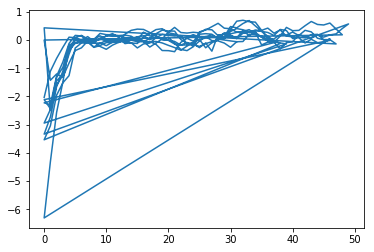

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(data_clean['pressureDerivative'])

In [68]:
X = data_clean[['pressureDerivative', ' pressureIQR']].values
X.shape

(390, 2)

In [69]:
Y = data_clean['prediction'].values
Y = Y.reshape(-1,1)
Y.shape

(390, 1)

In [52]:
print(X[:5])
print(Y[:5])

[[-2.03525571  1.69579643]
 [-1.10709071  1.26496003]
 [-0.65279495 -0.09500334]
 [-0.26334071 -0.77824894]
 [ 0.09983143 -0.88704601]]
[[1]
 [1]
 [1]
 [1]
 [1]]


## Simple Classification

In [70]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [71]:
kf = KFold(n_splits=5)
# print(list(kf.split(X)))
# print(list(kf.split(Y)))
for train, test in kf.split(X):
    XTrain, XTest, YTrain, YTest = X[train], X[test], Y[train], Y[test]
    clf = RandomForestClassifier(n_estimators=500, random_state=seed )
    clf = clf.fit(XTrain, YTrain.ravel())
    YPred = clf.predict(XTest)
#     print(YPred.shape)
    diff = YPred - YTest.ravel()
#     print(diff.shape)
#     print(diff)
    score = diff[diff == 0].size
    print(score, YPred.size)
    print((100.0 * score)/(YPred.size))

31 78
39.743589743589745
48 78
61.53846153846154
49 78
62.82051282051282
33 78
42.30769230769231
52 78
66.66666666666667


In [72]:
kf = KFold(n_splits=5)
# print(list(kf.split(X)))
# print(list(kf.split(Y)))
for train, test in kf.split(X):
    XTrain, XTest, YTrain, YTest = X[train], X[test], Y[train], Y[test]
    clf = svm.SVC(kernel='linear')
    clf = clf.fit(XTrain, YTrain.ravel())
    YPred = clf.predict(XTest)
#     print(YPred.shape)
    diff = YPred - YTest.ravel()
#     print(diff.shape)
#     print(diff)
    score = diff[diff == 0].size
    print(score, YPred.size)
    print((100.0 * score)/(YPred.size))

17 78
21.794871794871796
17 78
21.794871794871796
26 78
33.333333333333336
4 78
5.128205128205129
9 78
11.538461538461538


In [73]:
kf = KFold(n_splits=5)
# print(list(kf.split(X)))
# print(list(kf.split(Y)))
for train, test in kf.split(X):
    XTrain, XTest, YTrain, YTest = X[train], X[test], Y[train], Y[test]
    clf = KNeighborsClassifier(n_neighbors=3)
    clf = clf.fit(XTrain, YTrain.ravel())
    YPred = clf.predict(XTest)
#     print(YPred.shape)
    diff = YPred - YTest.ravel()
#     print(diff.shape)
#     print(diff)
    score = diff[diff == 0].size
    print(score, YPred.size)
    print((100.0 * score)/(YPred.size))

32 78
41.02564102564103
40 78
51.282051282051285
54 78
69.23076923076923
31 78
39.743589743589745
50 78
64.1025641025641


## Stratified Cross Validation

In [74]:
skf = StratifiedKFold(n_splits=5)
# print(list(kf.split(X)))
# print(list(kf.split(Y)))
for train, test in skf.split(X, Y.ravel()):
    XTrain, XTest, YTrain, YTest = X[train], X[test], Y[train], Y[test]
    clf = RandomForestClassifier(n_estimators=500, random_state=seed )
    clf = clf.fit(XTrain, YTrain.ravel())
    YPred = clf.predict(XTest)
    diff = YPred - YTest.ravel()
    score = diff[diff == 0].size
    print(score, YPred.size)
    print((100.0 * score)/(YPred.size))

54 79
68.35443037974683
42 78
53.84615384615385
43 78
55.12820512820513
53 78
67.94871794871794
50 77
64.93506493506493


In [75]:
skf = StratifiedKFold(n_splits=5)
# print(list(kf.split(X)))
# print(list(kf.split(Y)))
for train, test in skf.split(X, Y.ravel()):
    XTrain, XTest, YTrain, YTest = X[train], X[test], Y[train], Y[test]
    clf = svm.SVC(kernel='linear')
    clf = clf.fit(XTrain, YTrain.ravel())
    YPred = clf.predict(XTest)
    diff = YPred - YTest.ravel()
    score = diff[diff == 0].size
    print(score, YPred.size)
    print((100.0 * score)/(YPred.size))

56 79
70.88607594936708
47 78
60.256410256410255
49 78
62.82051282051282
47 78
60.256410256410255
45 77
58.44155844155844


In [76]:
skf = StratifiedKFold(n_splits=5)
# print(list(kf.split(X)))
# print(list(kf.split(Y)))
for train, test in skf.split(X, Y.ravel()):
    XTrain, XTest, YTrain, YTest = X[train], X[test], Y[train], Y[test]
    clf = KNeighborsClassifier(n_neighbors=3)
    clf = clf.fit(XTrain, YTrain.ravel())
    YPred = clf.predict(XTest)
    diff = YPred - YTest.ravel()
    score = diff[diff == 0].size
    print(score, YPred.size)
    print((100.0 * score)/(YPred.size))

52 79
65.82278481012658
39 78
50.0
41 78
52.56410256410256
47 78
60.256410256410255
52 77
67.53246753246754


## One Hot Encoded Outputs

In [77]:
ohe = OneHotEncoder()
YO = ohe.fit_transform(Y)
print(YO.shape)

(390, 2)


In [78]:
YO = YO.todense()
YO.shape

(390, 2)

In [79]:
kf = KFold(n_splits=5)
# print(list(kf.split(X)))
# print(list(kf.split(Y)))
for train, test in kf.split(X):
    XTrain, XTest, YTrain, YTest = X[train], X[test], YO[train], YO[test]
    print(len(XTrain), len(XTest), len(YTrain), len(YTest))
    clf = RandomForestClassifier(n_estimators=500, random_state=seed )
    clf = clf.fit(XTrain, YTrain)
    YPred = clf.predict(XTest)
#     print(YPred.shape)
    diff = YPred - YTest
#     print(diff.shape)
#     print(diff)
    score = diff[diff == 0].size
    print(score, YPred.size)
    print((100.0 * score)/(YPred.size))

312 78 312 78
63 156
40.38461538461539
312 78 312 78
97 156
62.17948717948718
312 78 312 78
100 156
64.1025641025641
312 78 312 78
66 156
42.30769230769231
312 78 312 78
103 156
66.02564102564102


In [80]:
kf = KFold(n_splits=5)
# print(list(kf.split(X)))
# print(list(kf.split(Y)))
for train, test in kf.split(X):
    XTrain, XTest, YTrain, YTest = X[train], X[test], YO[train], YO[test]
    clf = KNeighborsClassifier(n_neighbors=3)
    clf = clf.fit(XTrain, YTrain)
    YPred = clf.predict(XTest)
#     print(YPred.shape)
    diff = YPred - YTest
#     print(diff.shape)
#     print(diff)
    score = diff[diff == 0].size
    print(score, YPred.size)
    print((100.0 * score)/(YPred.size))

64 156
41.02564102564103
80 156
51.282051282051285
108 156
69.23076923076923
62 156
39.743589743589745
100 156
64.1025641025641


In [82]:
from sklearn.svm import LinearSVC
kf = KFold(n_splits=5)
# print(list(kf.split(X)))
# print(list(kf.split(Y)))
for train, test in kf.split(X):
    XTrain, XTest, YTrain, YTest = X[train], X[test], YO[train], YO[test]
    clf = LinearSVC(multi_class='crammer_singer')
    clf = clf.fit(XTrain, YTrain)
    YPred = clf.predict(XTest)
#     print(YPred.shape)
    diff = YPred - YTest
#     print(diff.shape)
#     print(diff)
    score = diff[diff == 0].size
    print(score, YPred.size)
    print((100.0 * score)/(YPred.size))

ValueError: bad input shape (169, 2)